In [1]:
import gym
import numpy as np
import gym.spaces
import rocket_lander_gym
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Searching for actions

In [2]:
env = gym.make('RocketLander-v0')
all_rew = []
for gen_count in range(3):
    env.reset()
    rewards=0

    PRINT_DEBUG_MSG = False

    def_action = [0, -10, 0]
    left_action = [5, 1, 5]
    right_action = [-5, 1, -5]
    action = [3, 0.001, 3]
    counter =- 1
    for counter in range(1000):
        env.render()
        if counter < 50:
            act = action
        elif 50 <= counter < 100:
            act = env.action_space.sample() #[0, -10, 0]
        else:
            act = [0, -10, 0]
        observation, reward, done, info = env.step(act)
        rewards+=reward

        if PRINT_DEBUG_MSG:
            print("Action Taken  ",action)
            print("Observation   ",observation)
            print("Reward Gained ",reward)
            print("Info          ",info,end='\n\n')

        if done:
            print("Simulation done.")
            break
    env.close()
    all_rew.append(rewards)

Simulation done.
Simulation done.
Simulation done.


In [109]:
for i in range(5):
    print(env.action_space.sample())
    

[-0.51878923  0.65199655  0.80088866]
[-0.11184921 -0.20696358  0.63560474]
[ 0.43514597 -0.7506861   0.29814124]
[-0.81662583 -0.08829784 -0.38534406]
[0.54140013 0.8753336  0.25568005]


In [216]:
actions = [
    [10, 10, 10],
    [4, 0.1, 4],
    [-0.4, 0.6 , -0.15],
    [2, 0, 2],
    [0, 0, 0],
    ###########
    [-0.52,  0.66,  0.80],
    [-0.11, 0.21,  0.64],
    [ 0.46, 0.75,   0.3],
    [-0.82, 0.09, -0.39],
    [0.54, 0.88,  0.26]
]

actions = [
    [-0.11, 0.21, 0.64],
    
    [0.54, 0.88, 0.26],
#     [-0.4, 0.6, -0.15],
    [10, 10, 10],
    
    [-0.82, 0.09, -0.39],
    [2, 0, 2],
    [-0.5, 0.0001, 0.5],
    
    [4, 0.1, 4],
    [0, 0.0001, 0],
    [ 0.51,  -0.41, -0.18],
    
    [0, 0, 0]
]

In [150]:
def sample_hand_rewards(action, sim_num):
    """ Function plays simulation with particular hand (action input) and returns the list of rewards"""
    
    env = gym.make('RocketLander-v0')
    rewards_list = []
    for gen_count in range(sim_num):
        env.reset()
        rewards = 0
        for counter in range(1000):
            if counter < 50:
                act = action
            elif 50 <= counter < 130:
                act = env.action_space.sample() #[0, -10, 0]
            else:
                act = [0, -10, 0]
            observation, reward, done, info = env.step(act)
            rewards += reward
            if done:
#                 print("Simulation done.")
                break
        env.close()
        rewards_list.append(rewards)

    return rewards_list

In [27]:
med_grps = []
for times in range(3):
    medians = []
    for act in actions:
        medians.append(np.median(sample_hand_rewards(act, 300)))
        print(f'Sim act {act} done')
    print('-'*30)
    med_grps.append(medians)

Sim act [10, 10, 10] done
Sim act [4, 0.1, 4] done
Sim act [2, 0, 2] done
Sim act [0, 0, 0] done
------------------------------
Sim act [10, 10, 10] done
Sim act [4, 0.1, 4] done
Sim act [2, 0, 2] done
Sim act [0, 0, 0] done
------------------------------
Sim act [10, 10, 10] done
Sim act [4, 0.1, 4] done
Sim act [2, 0, 2] done
Sim act [0, 0, 0] done
------------------------------


In [28]:
med_grps[0]

[-4.068623688567085,
 -3.7582122410898995,
 -3.230589987529135,
 -2.9048052322390348]

In [29]:
med_grps[1]

[-4.0753657960390575,
 -3.7662331923469363,
 -3.247895519290019,
 -2.90715660863048]

In [30]:
med_grps[2]

[-4.066874838724358,
 -3.7569685994692055,
 -3.240596163657116,
 -2.9069879011312603]

In [217]:
rews_for_actions = {}
for act in actions:
    rews_for_actions[tuple(act)] = sample_hand_rewards(act, 500)
    print(f'Sim act {act} done')

Sim act [-0.11, 0.21, 0.64] done
Sim act [0.54, 0.88, 0.26] done
Sim act [10, 10, 10] done
Sim act [-0.82, 0.09, -0.39] done
Sim act [2, 0, 2] done
Sim act [-0.5, 0.0001, 0.5] done
Sim act [4, 0.1, 4] done
Sim act [0, 0.0001, 0] done
Sim act [0.51, -0.41, -0.18] done
Sim act [0, 0, 0] done


In [170]:
good_lst = []
for i in range(1000):
    act = env.action_space.sample()
    med = np.median(sample_hand_rewards(act, 100))
    if med > -3.3:
        print(i, med)
        good_lst.append((act, med))

10 -3.0110482535242022
12 -3.0185951770985593
15 -3.199089286539909
19 -3.074161206064396
24 -3.0456538328856158
32 -3.0044285118431535
46 -3.0354566880900102
48 -3.2912070160042295
49 -3.2161324270094376
65 -3.037047271751038
66 -3.0181583089017012
75 -3.0337877682620613
80 -3.0408035062509255
83 -3.1541690041350803
84 -3.052002148277138
87 -3.26935442175597
89 -3.0155274042300486
98 -3.082321803659081
99 -3.0189891431096227
101 -3.034586687287532
107 -3.0234387658565502
111 -3.297047980791877
114 -3.031758937522556
139 -3.1625496331740726
142 -3.293900279949253
149 -3.0155710986020585
165 -3.0009872711036656
167 -3.073005130156389
170 -3.0355507154887387
172 -3.0070580506017794
187 -3.295572781069498
199 -3.037675832201446
202 -3.0646173166716393
204 -3.2649877538000256
212 -3.0190492832294558
216 -3.268376940345082
220 -3.032726734075484
222 -3.118664551580804
224 -3.0420633642132953
226 -3.181676339103859
233 -3.125772633995761
242 -3.1427030578520423
245 -3.2670469184936546
250 -3

KeyboardInterrupt: 

In [212]:
random_acts = pd.DataFrame(good_lst)
top_random_acts = random_acts.sort_values(1, ascending=False).iloc[:10].reset_index(drop=True)
botom_random_acts = random_acts.sort_values(1, ascending=False).iloc[-40:-30].reset_index(drop=True)

In [213]:
botom_random_acts

,0,1
0,"[0.5555508, -0.03936743, 0.41620353]",-3.138178
1,"[0.5054033, -0.41131023, -0.17603314]",-3.141360
2,"[-0.5286986, -0.08852349, -0.08902211]",-3.142703
3,"[0.49553254, -0.2896466, -0.21641219]",-3.144065
4,"[0.5226237, -0.41159296, 0.08137905]",-3.148746
5,"[-0.5706117, -0.9745685, -0.3481058]",-3.149717
6,"[0.5400364, -0.7873548, 0.18072939]",-3.150175
7,"[0.5501775, -0.35332248, -0.31146476]",-3.150244
8,"[-0.5124252, -0.27786157, -0.29089943]",-3.154169
9,"[-0.551489, -0.39055094, 0.49909168]",-3.156685


In [214]:
rews_for_actions = {}
for act in list(botom_random_acts[0].values[:-1])+[[0,0,0]]:
    rews_for_actions[tuple(act)] = sample_hand_rewards(act, 100)
    print(f'Sim act {act} done')

Sim act [ 0.5555508  -0.03936743  0.41620353] done
Sim act [ 0.5054033  -0.41131023 -0.17603314] done
Sim act [-0.5286986  -0.08852349 -0.08902211] done
Sim act [ 0.49553254 -0.2896466  -0.21641219] done
Sim act [ 0.5226237  -0.41159296  0.08137905] done
Sim act [-0.5706117 -0.9745685 -0.3481058] done
Sim act [ 0.5400364  -0.7873548   0.18072939] done
Sim act [ 0.5501775  -0.35332248 -0.31146476] done
Sim act [-0.5124252  -0.27786157 -0.29089943] done
Sim act [0, 0, 0] done


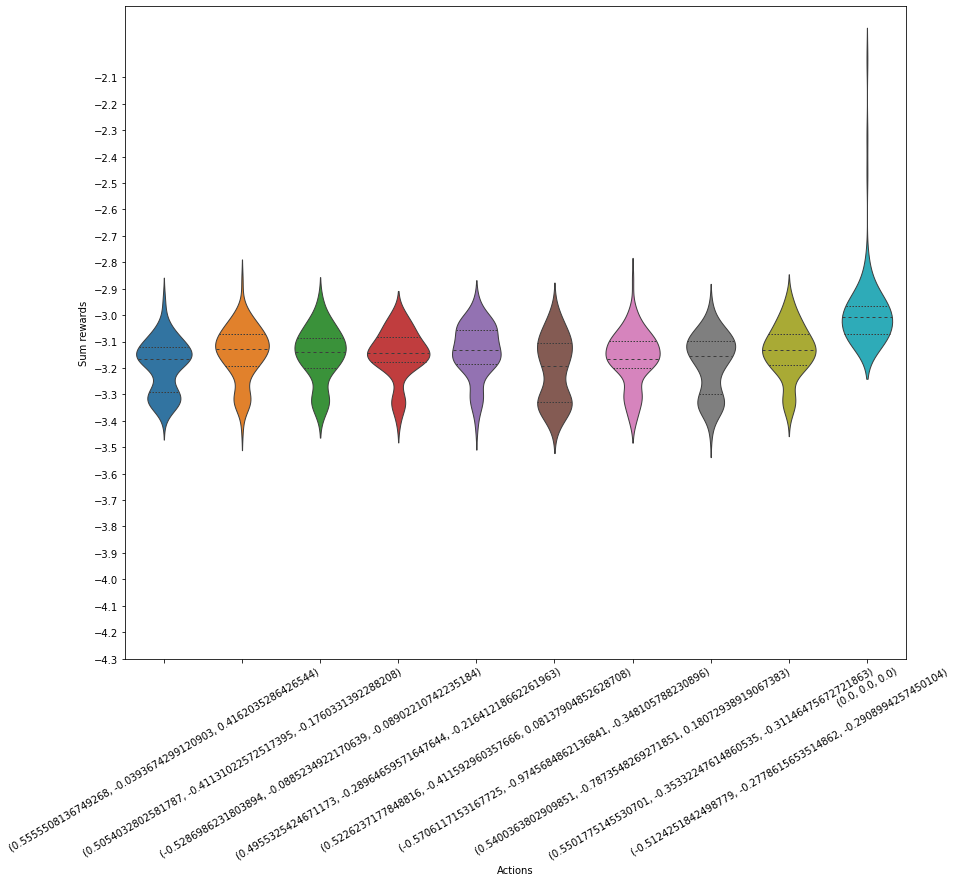

In [215]:
#near_top_actions
plt.figure(figsize=[14,12])
sns.violinplot(data=pd.DataFrame(rews_for_actions), linewidth=1, inner='quartile')
plt.yticks(np.arange(-4.3,-2,0.1))
plt.xticks(rotation='30')
plt.xlabel('Actions')
plt.ylabel('Sum rewards')
plt.show()

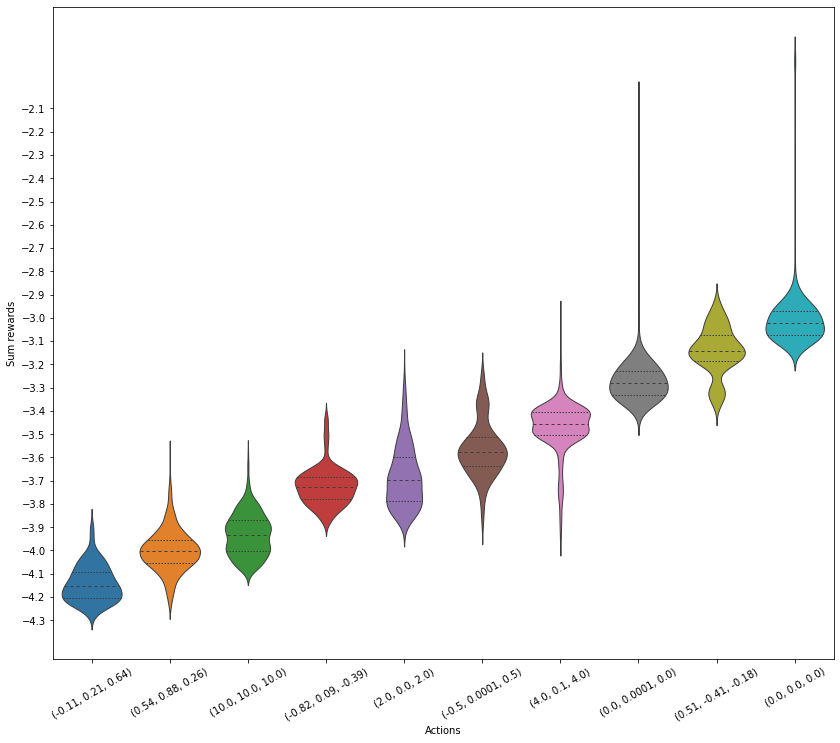

In [218]:
#extended_list_of_actions
plt.figure(figsize=[14,12])
sns.violinplot(data=pd.DataFrame(rews_for_actions), linewidth=1, inner='quartile')
plt.yticks(np.arange(-4.3,-2,0.1))
plt.xticks(rotation='30')
plt.xlabel('Actions')
plt.ylabel('Sum rewards')
plt.show()

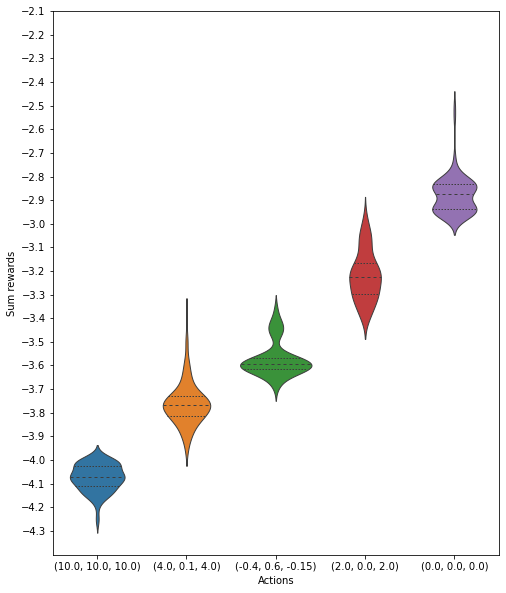

In [46]:
#hand_picked_actions
plt.figure(figsize=[8,10])
sns.violinplot(data=pd.DataFrame(rews_for_actions), linewidth=1, inner='quartile')
plt.yticks(np.arange(-4.3,-2,0.1))
plt.xlabel('Actions')
plt.ylabel('Sum rewards')
plt.show()

# Solutions

## Greedy

In [268]:
def init_counter_values(actions, def_val):
    res = {}
    for act in actions:
        res[tuple(act)] = def_val
    return res

def greedy_action(q_values, epsilon):
    if np.random.random() > epsilon:
        val_num = np.random.choice(np.argwhere(list(q_values.values()) == np.amax(list(q_values.values()))).flatten())
    else:
        val_num = np.random.choice(range(len(q_values.values())))
    return list(q_values.keys())[val_num]
    

def agent_step(reward, last_action, arm_count, q_values, epsilon):
    """
    Takes one step for the agent. It takes in a reward and observation and 
    returns the action the agent chooses at that time step.

    Arguments:
    reward -- float, the reward the agent recieved from the environment after taking the last action.
    observation -- float, the observed state the agent is in. Do not worry about this as you will not use it
                          until future lessons
    Returns:
    current_action -- int, the action chosen by the agent at the current time step.
    """

    last_action = tuple(last_action)
    arm_count[tuple(last_action)]+=1
    step_size = 1/arm_count[tuple(last_action)]
    correction_value = (reward-q_values[last_action])
    q_values[last_action] = q_values[last_action]+step_size*correction_value
    current_action = greedy_action(q_values, epsilon)
    return current_action, arm_count, q_values

In [329]:
total_rewards = []
total_averages = []
for ep in range(200):
    rewards = []
    averages = []
    for gen_count in range(100):
        ################################################################
        if gen_count == 0:
            current_action_num = np.random.choice(range(len(actions)))
            current_action = actions[current_action_num]
            arm_count = init_counter_values(actions, 0)
            q_values = init_counter_values(actions, -10)
        else:
            current_action, arm_count, q_values = agent_step(reward=reward, 
                                                             last_action=current_action, 
                                                             arm_count=arm_count,
                                                             q_values=q_values,
                                                             epsilon = 0)
        ################################################################
        reward = sample_hand_rewards(current_action, sim_num=1)[0]
        rewards.append(reward)
        average = sum(rewards)/(gen_count+1)
        averages.append(average)
    print(ep)
    total_rewards.append(rewards)
    total_averages.append(averages)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


Text(0, 0.5, 'Sum rewards')

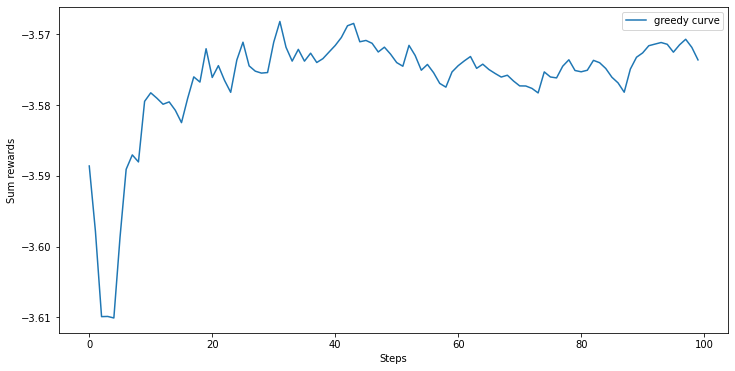

In [330]:
plt.figure(figsize=[12,6])
plt.plot(np.median(np.array(total_averages),axis=0), label='greedy curve')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')

## Epsilon greedy

In [361]:
eps_dict={}
for eps in [0.1, 0.2, 0.4]:
    total_aves = []
    for ep in range(200):
        rewards = []
        averages = []
        for gen_count in range(200):
            ################################################################
            if gen_count == 0:
                current_action_num = np.random.choice(range(len(actions)))
                current_action = actions[current_action_num]
                arm_count = init_counter_values(actions, 0)
                q_values = init_counter_values(actions, -10)
            else:
                current_action, arm_count, q_values = agent_step(reward=reward, 
                                                                 last_action=current_action, 
                                                                 arm_count=arm_count,
                                                                 q_values=q_values,
                                                                 epsilon=eps)
            ################################################################
            reward = sample_hand_rewards(current_action, sim_num=1)[0]
            rewards.append(reward)
            average = sum(rewards)/(gen_count+1)
            averages.append(average)
        if not ep%25:
            print(ep)
        total_aves.append(averages)
    print('-'*30,'NEW EPS', '-'*30)
    eps_dict[eps] = total_aves

0
25
50
75
100
125
150
175
------------------------------ NEW EPS ------------------------------
0
25
50
75
100
125
150
175
------------------------------ NEW EPS ------------------------------
0
25
50
75
100
125
150
175
------------------------------ NEW EPS ------------------------------


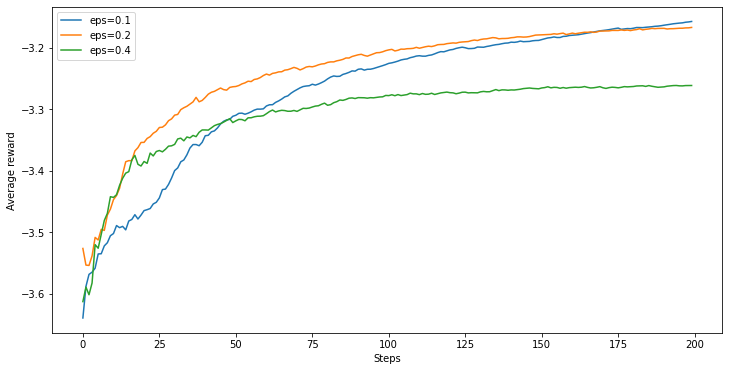

In [362]:
plt.figure(figsize=[12,6])
for eps in [0.1, 0.2, 0.4]:
    plt.plot(np.median(np.array(eps_dict[eps]),axis=0), label=f'eps={eps}')
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Average reward')

# Optimistic initial q-values

In [369]:
eps_dict={}
for eps in [0.1]: # 0.2, 0.4
    total_aves = []
    for ep in range(200):
        rewards = []
        averages = []
        for gen_count in range(200):
            ################################################################
            if gen_count == 0:
                current_action_num = np.random.choice(range(len(actions)))
                current_action = actions[current_action_num]
                arm_count = init_counter_values(actions, 0)
                q_values = init_counter_values(actions, 10)
            else:
                current_action, arm_count, q_values = agent_step(reward=reward, 
                                                                 last_action=current_action, 
                                                                 arm_count=arm_count,
                                                                 q_values=q_values,
                                                                 epsilon=eps)
            ################################################################
            reward = sample_hand_rewards(current_action, sim_num=1)[0]
            rewards.append(reward)
            average = sum(rewards)/(gen_count+1)
            averages.append(average)
        if not ep%25:
            print(ep)
        total_aves.append(averages)
    print('-'*30,'NEW EPS', '-'*30)
    eps_dict[eps] = total_aves

0
25
50
75
100
125
150
175
------------------------------ NEW EPS ------------------------------


Text(0, 0.5, 'Average reward')

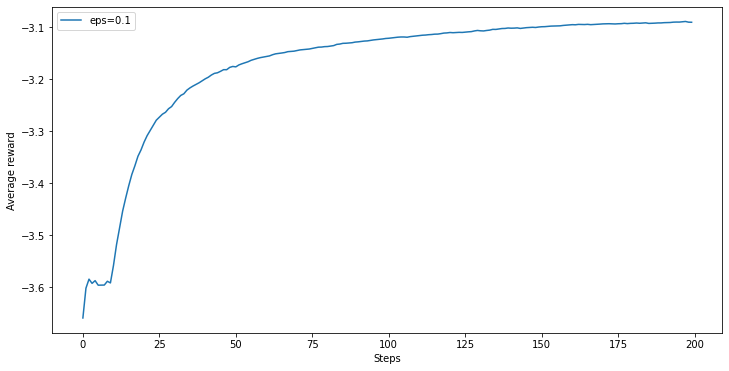

In [370]:
plt.figure(figsize=[12,6])
plt.plot(np.median(np.array(eps_dict[0.1]),axis=0), label=f'eps={eps}')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')